In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import numpy as np
import os
import glob

In [2]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [3]:
A_min = -4.0;
A_max = 4.0;
A_step = 0.01;

B_min = -4.0;
B_max = 4.0;
B_step = 0.01;


A_values = np.arange(A_min, A_max+A_step, A_step);
B_values = np.arange(B_min, B_max+B_step, B_step);

#A_values = A_values[:-1]

In [4]:
B_grid, A_grid = np.meshgrid(B_values, A_values)

In [5]:
path = "D:/Life and Science/Summer 2024/Heun/DataSets/"
full_file = path + "StabilityDiagramFull.csv"

test = pd.read_csv(full_file, header=None)

In [6]:
test = test.astype(str)

test = test.applymap(lambda x: 0 if 'If' in x else x)

test = test.astype(int)
test = test.to_numpy()
test = - test
test = np.transpose(test)

In [7]:
np.shape(test)

(801, 801)

In [8]:
rot_test = np.rot90(test, axes=(0,1))

In [9]:
left_x = np.arange(-4., 3.1, 0.1)
right_x = np.arange(-4., 3.1, 0.1)

left_boundary =  -left_x - 1
right_boundary = right_x + 1

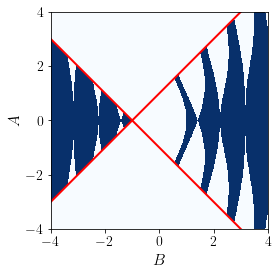

In [10]:
#plt.title(r"$\epsilon=0.05$", fontsize=16)
plt.pcolormesh(B_grid, A_grid, rot_test, cmap="Blues", rasterized=True)
#plt.pcolormesh(B_grid, A_grid, ph_lock_areas, cmap="Blues", rasterized=True)
plt.gca().set_aspect(1.)
plt.tick_params(axis='both', which='both', labelsize=14,
    left=True,
    bottom=True,
    top=False,
    labelleft=True,
    labelbottom=True)
plt.plot(left_x, left_boundary, color="red", linewidth=2.0)
plt.plot(right_x, right_boundary, color="red", linewidth=2.0)
plt.xlabel(r'$B$', fontsize=16)
plt.ylabel(r'$A$', fontsize=16)
plt.savefig('Hill_ICTP.pdf', bbox_inches='tight', dpi = 1200)
plt.show()